In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\kklka\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics, model_selection, feature_selection, pipeline, ensemble, tree, datasets
from ipywidgets import interact
import scipy.stats as scs
import seaborn as sns

# 1. Isinma

## a. Coklu lineer regresyon

ML calismalari sirasinda konseptleri daha iyi anlamak icin sentetik veri setleri siklikla kullanilmaktadir. 

Asagida bu tip sentetik bir veri olusturma ornegi gormektesiniz:

In [79]:
# Ilk dataseti olusturma
X, y = datasets.make_regression(
    n_samples=300, 
    n_features=5, 
    n_informative=2, 
    noise=2.21, 
    random_state=42, 
    bias=4.0, 
    effective_rank=4,
    )

# Rassal olcekleme
dataset = pd.DataFrame(X).add_prefix('x_').assign(y=y) \
    .mul([100,-28, 1e-3, 1e4 , -2e6, 1]) \
    .add([20, 3, 1e-2, 190, 45e4, 0])

Sentetik veri olusturma detaylarina asagidan ulasabilirsiniz:

[sklearn `make_regression` referans sayfasi](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html?highlight=make_regression#sklearn.datasets.make_regression)

In [80]:
dataset.head()

,x_0,x_1,x_2,x_3,x_4,y
0,23.759943,2.210352,0.009984,539.089271,414372.427923,8.339542
1,27.698499,3.595618,0.010019,12.016667,406526.554494,7.807190
2,24.985284,1.303974,0.010069,676.779297,479943.326623,6.536755
3,10.884757,2.776216,0.009971,-131.935680,318766.889976,15.370564
4,25.520207,2.612674,0.009999,703.003344,549051.899774,1.286639


### I.

Veri setini egitim ve test setleri olmak uzere ikiye ayiriniz.

Referanslar:
- [sklearn `train_test_split` referans sayfasi](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split)

In [81]:
from sklearn import model_selection

model_selection.train_test_split # bolme islemi icin bu fonksiyonu kullanabilirsiniz.


<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

Veri setinizi eğitim ve test setleri olmak üzere ikiye ayırmak için Python’da sklearn.model_selection modülünden train_test_split() 
fonksiyonunu kullanabilirsiniz12. Bu fonksiyon, verilerinizi belirli bir oranda karıştırarak ve bölerek eğitim ve test alt kümeleri oluşturur. 
Örneğin, veri setinizin %80’ini eğitim seti ve %20’sini test seti olarak ayırmak isterseniz, şöyle yapabilirsiniz:


Bu kodda, X ve y bağımsız ve bağımlı değişkenlerinizi içeren dizilerdir. test_size parametresi test setinin oranını belirler. 
random_state parametresi ise verilerin karıştırılma şeklini kontrol eder. Bu parametreleri değiştirerek farklı bölümler elde edebilirsiniz.

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Bu kodda, X ve y bağımsız ve bağımlı değişkenlerinizi içeren dizilerdir. test_size parametresi test setinin oranını belirler. random_state parametresi ise verilerin karıştırılma şeklini kontrol eder. Bu parametreleri değiştirerek farklı bölümler elde edebilirsiniz.

### II.

`x_i` degiskenlerinin bir fonksiyonu olarak `y`'yi modelleyen lineer regresyon modelini egitiniz.

Regresyon modeli icin scikit-learn `LinearRegression` sinifini kullaniniz.

- [sklearn `LinearRegression` referans sayfasi](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linearregression#sklearn.linear_model.LinearRegression)
    - Tum parametre aciklamalari ve kullanim ornekleri yukaridaki baglantida mevcuttur.

In [83]:
from sklearn import linear_model

linear_model.LinearRegression # Linear Regresyon Modeli sinifi

sklearn.linear_model._base.LinearRegression

LinearRegression sınıfından bir nesne oluşturun. Bu nesneyi modeliniz olarak kullanacaksınız. 
İsteğe bağlı olarak modelinizin parametrelerini değiştirebilirsiniz. Örneğin, modelinizin sabit terimini (bias) içermesini istemiyorsanız, 
fit_intercept=False olarak ayarlayabilirsiniz:

In [84]:
model = linear_model.LinearRegression(fit_intercept=True) # modeli olusturma

Modelinizi eğitim verileriyle uyumlu hale getirin. Bunun için model nesnenizin fit() metodunu çağırın ve bağımsız değişkenler (X_train) ve bağımlı değişken (y_train) dizilerini argüman olarak verin:

In [85]:
model.fit(X_train, y_train) # modeli egitme

LinearRegression()

Modelinizin eğitildikten sonra sahip olduğu katsayıları ve sabit terimi görüntüleyin. Bunun için model nesnenizin coef_ ve intercept_ özniteliklerini kullanabilirsiniz:

In [86]:
print("Model katsayilari", model.coef_)
print("Model sabit terimi", model.intercept_)

Model katsayilari [-2.79234531 61.35053809 -1.72183325  0.73729297 61.70184638]
Model sabit terimi 4.064096593776838


Modelinizin test verileri üzerindeki tahmin performansını değerlendirin. Bunun için model nesnenizin predict() metodunu çağırın ve test verilerinin bağımsız değişkenlerini (X_test) argüman olarak verin. Bu metot size test verilerinin bağımlı değişkenleri (y_test) için tahmin edilen değerleri (y_pred) döndürecektir:

In [87]:
y_pred = model.predict(X_test) # model ile tahmin etme

Tahmin edilen değerleri gerçek değerlerle karşılaştırarak modelinizin performansını ölçün. Bunun için sklearn.metrics modülünden uygun metrikleri içe aktarabilir ve kullanabilirsiniz. Örneğin, lineer regresyon modelleri için sık kullanılan metriklerden biri olan R^2 skorunu hesaplamak için şöyle yapabilirsiniz:

In [88]:
from sklearn.metrics import r2_score
print("R^2 skoru:", r2_score(y_test, y_pred))

R^2 skoru: 0.46317202071694996


### III.

Modelinizin egitim ve test seti uzerindeki asagidaki metriklerini rapor ediniz:

- MSE [sklearn `mean_squared_error` referans sayfasi](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html?highlight=mean_squared_error#sklearn.metrics.mean_squared_error)
- MAE [sklearn `mean_absolute_error` referans sayfasi](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html?highlight=mean_absolute_error#sklearn.metrics.mean_absolute_error)
- $R^2$ [sklearn `r2_score` referans sayfasi](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html?highlight=r2_score#sklearn.metrics.r2_score)

- Diger tum metrikler icin genel referans ve tam liste [sklearn `metrics` referans sayfasi](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.html?highlight=metrics#sklearn.metrics)

In [89]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error, median_absolute_error

# Eğitim verileri üzerinde tahmin yapma
y_train_pred = model.predict(X_train)

# Test verileri üzerinde tahmin yapma
y_test_pred = model.predict(X_test)

# MSE hesaplama
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# MAE hesaplama
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# R^2 hesaplama
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Diğer metrikler
explained_variance = explained_variance_score(y_test, y_test_pred)
max_err = max_error(y_test, y_test_pred)
median_ae = median_absolute_error(y_test, y_test_pred)

# Metrikleri rapor etme
print(f"Eğitim Seti MSE: {mse_train}")
print(f"Test Seti MSE: {mse_test}")
print(f"Eğitim Seti MAE: {mae_train}")
print(f"Test Seti MAE: {mae_test}")
print(f"Eğitim Seti R^2: {r2_train}")
print(f"Test Seti R^2: {r2_test}")
print(f"Explained Variance Score: {explained_variance}")
print(f"Max Error: {max_err}")
print(f"Median Absolute Error: {median_ae}")


Eğitim Seti MSE: 4.630675923188127
Test Seti MSE: 5.168898012290558
Eğitim Seti MAE: 1.691912141522534
Test Seti MAE: 1.7835851464135393
Eğitim Seti R^2: 0.6954440527120627
Test Seti R^2: 0.46317202071694996
Explained Variance Score: 0.46678745148246703
Max Error: 6.81873481770213
Median Absolute Error: 1.5704220721394506


In [90]:
from sklearn import metrics  # istediginiz metrikler bu modulde olabilir

metrics.mean_squared_error
metrics.mean_absolute_error
metrics.r2_score;


Modelinizin eğitim ve test seti üzerindeki istenen metrikleri rapor etmek için şu adımları izleyebilirsiniz:

sklearn.metrics modülünden gerekli metrikleri içe aktarın:

In [91]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Modelinizin eğitim verileri üzerindeki tahminlerini elde edin. Bunun için model nesnenizin predict() metodunu çağırın ve eğitim verilerinin bağımsız değişkenlerini (X_train) argüman olarak verin. Bu metot size eğitim verilerinin bağımlı değişkenleri (y_train) için tahmin edilen değerleri (y_train_pred) döndürecektir:

In [92]:
y_train_pred = model.predict(X_train)

Modelinizin test verileri üzerindeki tahminlerini elde edin. Bunun için model nesnenizin predict() metodunu çağırın ve test verilerinin bağımsız değişkenlerini (X_test) argüman olarak verin. Bu metot size test verilerinin bağımlı değişkenleri (y_test) için tahmin edilen değerleri (y_test_pred) döndürecektir:

In [93]:
y_test_pred = model.predict(X_test)

Eğitim ve test setleri için istenen metrikleri hesaplayın. Bunun için içe aktardığınız metrik fonksiyonlarını çağırın ve gerçek ve tahmin edilen değerleri argüman olarak verin. Örneğin, eğitim seti için MSE hesaplamak için şöyle yapabilirsiniz:

In [94]:
mse_train = mean_squared_error(y_train, y_train_pred)

Hesapladığınız metrikleri istediğiniz şekilde raporlayın. Örneğin, ekrana yazdırmak için print() fonksiyonunu kullanabilirsiniz:

In [95]:
print("Eğitim seti için MSE:", mse_train)

Eğitim seti için MSE: 4.630675923188127


### IV.

Her bir degisken icin bulmus oldugunuz katsayi degerlerini ve intersepti rapor ediniz.

- Katsayi ve intersept degerlerinin hangi attribute'larda tutuldugunu bulmak icin [sklearn `LinearRegression` referans sayfasi](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linearregression#sklearn.linear_model.LinearRegression)'ndan yararlanabilirsiniz.

In [96]:
coef = model.coef_

Model nesnenizin intercept_ özniteliğini kullanarak intersept değerini elde edin. Bu öznitelik size modelinizin sabit terimini veren bir skaler döndürecektir:

In [97]:
intercept = model.intercept_

Elde ettiğiniz katsayı ve intersept değerlerini istediğiniz şekilde raporlayın. Örneğin, ekrana yazdırmak için print() fonksiyonunu kullanabilirsiniz:

In [98]:
print("Katsayılar:", coef)
print("Sabit Değer:", intercept)

Katsayılar: [-2.79234531 61.35053809 -1.72183325  0.73729297 61.70184638]
Sabit Değer: 4.064096593776838


### V.

Degiskenlerin katsayilari, degiskenlerin onemi ile ilgili bilgi vermekte midir? Tartisiniz.

Değişkenlerin katsayıları, değişkenlerin önemi ile ilgili bilgi vermekte midir sorusunun kesin bir cevabı yoktur. Bu sorunun cevabı, değişkenlerin ölçeklenmesine, modelin varsayımlarına ve kullanılan önem ölçütüne bağlıdır.

Bazı durumlarda, değişkenlerin katsayılarının büyüklüğü, değişkenlerin önemini yansıtabilir. Örneğin, eğer değişkenler aynı ölçekte ise ve modelin varsayımları sağlanıyorsa, katsayısı büyük olan değişkenin bağımlı değişken üzerinde daha fazla etkisi olduğu söylenebilir. Bu durumda, katsayılar önem ölçütü olarak kullanılabilir.

Ancak bazı durumlarda, değişkenlerin katsayıları, değişkenlerin önemini yansıtmayabilir. Örneğin, eğer değişkenler farklı ölçeklerde ise ve modelin varsayımları sağlanmıyorsa, katsayısı küçük olan değişkenin bağımlı değişken üzerinde daha az etkisi olduğu söylenemez. Bu durumda, katsayılar önem ölçütü olarak kullanılamaz.

Bu nedenle, değişkenlerin önemini belirlemek için katsayılara bakmak yeterli olmayabilir. Değişkenlerin önemini belirlemek için farklı yöntemler kullanılabilir. Örneğin, p-değerleri, t-istatistikleri, varyans analizi (ANOVA), varyans açıklama oranları (R^2), özelliğe dayalı seçim (FBS), geriye doğru eleme (BES), ileriye doğru seçim (FES), adım adım seçim (SES) gibi yöntemler kullanılabilir. Bu yöntemlerin avantajları ve dezavantajları vardır ve her biri farklı bir önem ölçütü sunar.

### VI.

- Egitim setinizi olcekleyip lineer regresyon modelinizi tekrar egitiniz. Asagidaki olcekleme yontemlerinden herhangi birini kullanabilir ya da kendi tercih ettiginiz baska bir olcekleme uygulayabilirsiniz.
    - Standart scaler [sklearn `StandardScaler` referans sayfasi](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standardscaler#sklearn.preprocessing.StandardScaler)
    - Minmax scaler [sklearn `MinMaxScaler` referans sayfasi](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?highlight=minmaxscaler#sklearn.preprocessing.MinMaxScaler)
- Elde edilen katsayilar, degiskenlerin onemine dair bilgi vermekte midir?

In [99]:
from sklearn import preprocessing

preprocessing.StandardScaler

sklearn.preprocessing._data.StandardScaler

In [100]:
from sklearn import preprocessing



Eğitim setinizi ölçekleyip lineer regresyon modelinizi tekrar eğitmek için şu adımları izleyebilirsiniz:

In [101]:
from sklearn.preprocessing import StandardScaler

Ölçekleme yönteminden bir nesne oluşturun. Bu nesneyi ölçekleyici olarak kullanacaksınız. İsteğe bağlı olarak ölçekleyicinizin parametrelerini değiştirebilirsiniz. Örneğin, standart scaler kullanırken ortalamayı 0 yapmak istemiyorsanız, with_mean=False olarak ayarlayabilirsiniz:

In [102]:
scaler = StandardScaler(with_mean=True)

Ölçekleyicinizi eğitim verileriyle uyumlu hale getirin. Bunun için ölçekleyici nesnenizin fit() metodunu çağırın ve eğitim verilerinin bağımsız değişkenlerini (X_train) argüman olarak verin:

In [103]:
scaler.fit(X_train)

StandardScaler()

Ölçekleyicinizi eğitim ve test verilerine uygulayın. Bunun için ölçekleyici nesnenizin transform() metodunu çağırın ve verilerin bağımsız değişkenlerini argüman olarak verin. Bu metot size ölçeklenmiş değerleri içeren yeni diziler döndürecektir:

In [104]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Modelinizin parametrelerini aynı tutarak ölçeklenmiş verilerle tekrar eğitin. Bunun için model nesnenizin fit() metodunu çağırın ve ölçeklenmiş bağımsız değişkenler (X_train_scaled) ve bağımlı değişken (y_train) dizilerini argüman olarak verin:

In [105]:
model.fit(X_train_scaled, y_train)

LinearRegression()

Modelinizin katsayılarını ve interseptini görüntüleyin. Bunun için model nesnenizin coef_ ve intercept_ özniteliklerini kullanabilirsiniz:

In [106]:
print("Model katsayilari", model.coef_)
print("Model intercept", model.intercept_)

Model katsayilari [-0.14457467  2.69303071 -0.08902532  0.03799114  2.79292494]
Model intercept 3.4880295004603212


Elde ettiğiniz katsayıların değişkenlerin önemine dair bilgi verip vermediğini değerlendirin. Eğer değişkenler aynı ölçekte ise ve modelinizin varsayımları sağlanıyorsa, katsayısı büyük olan değişkenin bağımlı değişken üzerinde daha fazla etkisi olduğu söylenebilir. Ancak eğer değişkenler farklı ölçeklerde ise veya modelinizin varsayımları sağlanmıyorsa, katsayılar önem ölçütü olarak kullanılamaz.

### VII.

Yeni egitmis oldugunuz model ile asagidaki verilerin `y` degerlerini tahmin ediniz.

|    |     x_0 |      x_1 |        x_2 |       x_3 |    x_4 |
|---:|--------:|---------:|-----------:|----------:|-------:|
|  0 | 16.7802 | 2.74543  | 0.00999759 | -201.841  | 384903 |
|  1 | 21.5037 | 4.99533  | 0.0100229  |  -73.2601 | 549222 |
|  2 | 16.8287 | 0.968607 | 0.00997303 | -120.439  | 470843 |

In [107]:
import pandas as pd
data = pd.DataFrame({"x_0": [16.7802, 21.5037, 16.8287], "x_1": [2.74543, 4.99533, 0.968607], "x_2": [0.00999759, 0.0100229, 0.00997303], "x_3": [-201.841, -73.2601, -120.439], "x_4": [384903, 549222, 470843]})

In [108]:
data

,x_0,x_1,x_2,x_3,x_4
0,16.7802,2.745430,0.009998,-201.8410,384903
1,21.5037,4.995330,0.010023,-73.2601,549222
2,16.8287,0.968607,0.009973,-120.4390,470843


Verileri ölçekleyici nesnenizin transform() metodunu kullanarak ölçekleyin. Bu metot size ölçeklenmiş değerleri içeren yeni bir dizi döndürecektir:

In [109]:
data_scaled = scaler.transform(data)

c:\Users\kklka\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Model nesnenizin predict() metodunu kullanarak verilerin y değerlerini tahmin edin. Bu metot size tahmin edilen değerleri içeren yeni bir dizi döndürecektir:

In [110]:
y_pred = model.predict(data_scaled)

In [111]:
print("Tahmin edilen y değerleri", y_pred)

Tahmin edilen y değerleri [23749202.58437898 33888207.92384262 29051810.13468548]


## b. Statsmodels ile coklu lineer regresyon

`scikit-learn`'e ek olarak, `statsmodels` kutuphanesi de pek cok istatistiksel analizi yapabilmektedir. Bu kisimda `statsmodels` ile lineer regresyon uygulamasi yapacagiz.

In [112]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\kklka\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [113]:
import statsmodels.api as sm

### I. 

`sm.OLS` ([statsmodels `OLS` referans sayfasi](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html?highlight=ols#statsmodels.regression.linear_model.OLS)) sinifi kullanarak `dataset` verisi uzerinde lineer regresyon modelini egitiniz.

In [114]:
X = dataset.drop('y', axis=1)
y = dataset['y']


sm.OLS # Ordinary Least Squares (OLS) Regresyon Modeli
# referanstan yararlanarak classi uygun sekilde kullaniniz

statsmodels.regression.linear_model.OLS

sm.OLS sınıfından bir nesne oluşturun. Bu nesneyi modeliniz olarak kullanacaksınız. Bu sınıfın ilk argümanı bağımlı değişken (y) dizisi, ikinci argümanı ise bağımsız değişkenler (X) dizisidir. Ayrıca, modelinizin sabit terim (intercept) içermesini istiyorsanız, bağımsız değişkenlerinize bir sütun olarak 1 değerleri eklemeniz gerekir. Bunun için sm.add_constant() fonksiyonunu kullanabilirsiniz:

In [115]:
model = sm.OLS(y, sm.add_constant(X))

Modelinizi eğitim verileriyle uyumlu hale getirin. Bunun için model nesnenizin fit() metodunu çağırın:

In [116]:
results = model.fit()

### II.

Egitmis oldugunuz lineer regresyon modelinin ozetini yazdiriniz.

Modelinizin sonuçlarını görüntüleyin. Bunun için sonuç nesnenizin summary() metodunu çağırabilirsiniz. Bu metot size modelinizin katsayılarını, p-değerlerini, R^2 skorunu ve diğer istatistiksel bilgileri içeren bir tablo döndürecektir:

In [117]:
display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     118.7
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           2.25e-68
Time:                        00:32:28   Log-Likelihood:                -657.77
No. Observations:                 300   AIC:                             1328.
Df Residuals:                     294   BIC:                             1350.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.8043     24.893      1.278      0.202     -17.187      80.796
x_0           -0.0381      0.025     -1.548      0.123      -0.087       0.010
x_1           -2.0817      0.110    -19.002      0.000      -2.297      -1.866
x_2         -781.0870   2488.590     -0.314      0.754   -5678.795    4116.621
x_3         7.291e-05      0.000      0.284      0.776      -0.000       0.001
x_4        -2.887e-05   1.49e-06    -19.421      0.000   -3.18e-05   -2.59e-05
==============================================================================
Omnibus:                        1.200   Durbin-Watson:                   2.209
Prob(Omnibus):                  0.549   Jarque-Bera (JB):                0.928
Skew:                          -0.075   Prob(JB):                        0.629
Kurtosis:                       3.228   Cond. No.                     9.13e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.13e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### III.

Model ozetine gore, hangi degiskenlerin katsayilari istatistiksel olarak 0'dan farkli degildir? (katsayinin 0 olmasi, degiskenin etkisiz olduguna isaret edecektir.)

Soruyu cevaplarken ozet tablosundaki hangi verilerden yararlandiginizi aciklayiniz.

Model özetine göre, x_0, x_2 ve x_3 değişkenlerinin katsayıları istatistiksel olarak 0’dan farklı değildir. Bu değişkenlerin etkisiz olduğuna işaret edebilir.

Soruyu cevaplarken özet tablosundaki p-değerleri (P>|t|) sütunundan yararlandım. P-değeri, katsayının 0 olduğu hipotezinin reddedilme olasılığını gösterir. P-değeri küçükse, katsayının 0 olduğu hipotezi reddedilir ve katsayının anlamlı olduğu sonucuna varılır. P-değeri büyükse, katsayının 0 olduğu hipotezi reddedilemez ve katsayının anlamsız olduğu sonucuna varılır.

Genellikle, p-değeri 0.05’ten küçükse, katsayının anlamlı olduğu kabul edilir. Bu durumda, x_0, x_2 ve x_3 değişkenlerinin p-değerleri 0.05’ten büyük olduğu için, katsayılarının 0’dan farklı olmadığını söyleyebiliriz.

### IV.

`sm.formula.ols` fonksiyonunu kullanarak, `dataset` verisi uzerinde lineer regresyon modelini egitiniz.

[statsmodels `formula` referans sayfasi](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html?highlight=ols#statsmodels.formula.api.ols)

- Yukarida tespit etmis oldugunuz etkisiz degiskenlerden ikisini modelden cikariniz.
- Ozet tablosuna gore, modelinizin performansini rapor ediniz.

In [118]:
# Ornek model

result = sm.formula.ols('y ~ x_1 + x_4 - 1', data=dataset).fit()  # degiskenler rastgele secilmistir
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.383
Model:                            OLS   Adj. R-squared (uncentered):              0.379
Method:                 Least Squares   F-statistic:                              92.51
Date:                Mon, 16 Oct 2023   Prob (F-statistic):                    5.58e-32
Time:                        00:32:29   Log-Likelihood:                         -849.95
No. Observations:                 300   AIC:                                      1704.
Df Residuals:                     298   BIC:                                      1711.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x_1           -0.2280      0.155     -1.470      0.143      -0.533       0.077
x_4         8.415e-06   1.12e-06      7.509      0.000    6.21e-06    1.06e-05
==============================================================================
Omnibus:                        8.957   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               15.187
Skew:                          -0.114   Prob(JB):                     0.000504
Kurtosis:                       4.078   Cond. No.                     3.02e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [119]:
import statsmodels.formula.api as smf

smf.ols fonksiyonunu kullanarak modelinizi oluşturun. Bu fonksiyonun ilk argümanı formül, ikinci argümanı ise veri çerçevesidir. Formülde, bağımlı değişkeni (y) ve bağımsız değişkenleri (x_0, x_1, …) belirtmeniz gerekir. Ayrıca, modelinizin sabit terim (intercept) içermesini istemiyorsanız, formülün sonuna -1 eklemeniz gerekir. Örneğin, etkisiz olduğunu tespit ettiğiniz x_0 ve x_2 değişkenlerini modelden çıkarmak isterseniz, şöyle yapabilirsiniz:

In [120]:
model = smf.ols(formula='y ~ x_1 + x_4 - 1', data=dataset)

Modelinizi eğitim verileriyle uyumlu hale getirin. Bunun için model nesnenizin fit() metodunu çağırın:

In [121]:
results = model.fit()

Modelinizin sonuçlarını görüntüleyin. Bunun için sonuç nesnenizin summary() metodunu çağırabilirsiniz. Bu metot size modelinizin katsayılarını, p-değerlerini, R^2 skorunu ve diğer istatistiksel bilgileri içeren bir tablo döndürecektir:

In [122]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.383
Model:                            OLS   Adj. R-squared (uncentered):              0.379
Method:                 Least Squares   F-statistic:                              92.51
Date:                Mon, 16 Oct 2023   Prob (F-statistic):                    5.58e-32
Time:                        00:32:32   Log-Likelihood:                         -849.95
No. Observations:                 300   AIC:                                      1704.
Df Residuals:                     298   BIC:                                      1711.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x_1           -0.2280      0.155     -1.470      0.143      -0.533       0.077
x_4         8.415e-06   1.12e-06      7.509      0.000    6.21e-06    1.06e-05
==============================================================================
Omnibus:                        8.957   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               15.187
Skew:                          -0.114   Prob(JB):                     0.000504
Kurtosis:                       4.078   Cond. No.                     3.02e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Modelinizin performansını rapor edin. Bunun için özet tablosundaki R^2 skoruna bakabilirsiniz. R^2 skoru, modelinizin bağımlı değişkenin varyansını ne kadar açıkladığını gösterir. R^2 skoru 0 ile 1 arasında bir değer alır ve ne kadar yüksekse modeliniz o kadar iyi demektir.

### V.

Ozet tablosundaki asagidaki terimlerin anlamlariyla ilgili kisa bilgi veriniz:

- `F-statistic`
- `Log-likelihood`
- `AIC`
- `BIC`
- `Jarque-Bera`
- `Durbin-Watson`
- `Cond. No.`


- F-statistic: Modelinizin tüm katsayılarının 0 olduğu hipotezinin reddedilme olasılığını gösterir. F-istatistiği büyükse, modelinizin anlamlı olduğu sonucuna varılır. F-istatistiğinin p-değeri (Prob (F-statistic)) ise bu sonucun güvenilirliğini gösterir. P-değeri küçükse, modelinizin anlamlı olduğu kabul edilir.
- Log-likelihood: Modelinizin verileri ne kadar iyi ürettiğini gösterir. Log-olasılık değeri büyükse, modeliniz verileri iyi açıklıyor demektir. Log-olasılık değeri, modelinizin karmaşıklığına bağlı olarak değişir. Karmaşık modeller daha yüksek log-olasılık değerine sahip olabilir, ancak bu her zaman daha iyi oldukları anlamına gelmez.
- AIC: Modelinizin karmaşıklığını ve uyumunu bir arada değerlendiren bir ölçüttür. AIC, log-olasılık değerinden modelinizdeki parametre sayısının iki katını çıkararak hesaplanır. AIC değeri küçükse, modeliniz hem uyumlu hem de basit demektir. AIC, farklı modelleri karşılaştırmak için kullanılabilir.
- BIC: Modelinizin karmaşıklığını ve uyumunu bir arada değerlendiren bir başka ölçüttür. BIC, log-olasılık değerinden modelinizdeki parametre sayısının veri sayısının doğal logaritması ile çarpımını çıkararak hesaplanır. BIC değeri küçükse, modeliniz hem uyumlu hem de basit demektir. BIC, farklı modelleri karşılaştırmak için kullanılabilir.
- Jarque-Bera: Modelinizin hata terimlerinin normal dağılıma uyup uymadığını test eden bir istatistiktir. Jarque-Bera istatistiği küçükse, hata terimleri normal dağılıma yakın demektir. Jarque-Bera istatistiğinin p-değeri (Prob(JB)) ise bu sonucun güvenilirliğini gösterir. P-değeri büyükse, hata terimleri normal dağılıma uyuyor demektir.
- Durbin-Watson: Modelinizin hata terimlerinin otokorelasyon (birbiriyle ilişkili olma) durumunu test eden bir istatistiktir. Durbin-Watson istatistiği 0 ile 4 arasında bir değer alır ve 2’ye yakın olması idealdir. Durbin-Watson istatistiği 2’den çok küçükse, hata terimleri pozitif otokorelasyon gösteriyor demektir. Durbin-Watson istatistiği 2’den çok büyükse, hata terimleri negatif otokorelasyon gösteriyor demektir.
- Cond. No.: Modelinizin çoklu doğrusal bağlantı (bağımsız değişkenler arasında yüksek korelasyon) sorunu olup olmadığını gösteren bir ölçüttür. Cond. No. (Condition Number) değeri büyükse, modelinizde çoklu doğrusal bağlantı sorunu var demektir.

## c. Lineer regresyon varsayimlari

### I.

Lineer regresyonun kullanilabilmesi (ya da sonuclarin anlamli bir sekilde yorumlanabilmesi) icin, datasetin hangi **varsayimlara** uymasi gerekmektedir?

Lineer regresyonun kullanılabilmesi (ya da sonuçların anlamlı bir şekilde yorumlanabilmesi) için, datasetin aşağıdaki varsayımlara uyması gerekmektedir:

- Lineerlik: Bağımlı değişken ile bağımsız değişkenler arasında lineer bir ilişki olmalıdır. Bu varsayım, saçılım (scatter) grafikleri veya kısmi regresyon (partial regression) grafikleri ile kontrol edilebilir.
- Normal dağılım: Modelin hata terimleri normal dağılıma uygun olmalıdır. Bu varsayım, Q-Q (quantile-quantile) grafikleri veya Jarque-Bera testi ile kontrol edilebilir.
- Homoskedastisite: Modelin hata terimlerinin varyansı bağımsız değişkenlerden bağımsız olmalıdır. Yani, hata terimleri sabit bir varyansa sahip olmalıdır. Bu varsayım, saçılım grafikleri veya Breusch-Pagan testi ile kontrol edilebilir.
- Otokorelasyon: Modelin hata terimleri birbiriyle ilişkili olmamalıdır. Yani, hata terimleri bağımsız ve rastgele olmalıdır. Bu varsayım, Durbin-Watson testi ile kontrol edilebilir.
- Çoklu doğrusal bağlantı: Bağımsız değişkenler arasında yüksek korelasyon olmamalıdır. Yani, bağımsız değişkenler birbirinden bağımsız olmalıdır. Bu varsayım, korelasyon matrisi, VIF (Variance Inflation Factor) değerleri veya Condition Number değeri ile kontrol edilebilir.

### II.

`b.V`'de aciklamis oldugunuz terimleri, kontrol ettikleri varsayimlar ile eslestiriniz

- F-statistic: Modelinizin tüm katsayılarının 0 olduğu hipotezini test eder. Bu hipotez, modelinizin anlamlı olup olmadığı ile ilgilidir. Bu varsayım lineer regresyonun temelidir.
- Log-likelihood: Modelinizin verileri ne kadar iyi ürettiğini ölçer. Bu değer, modelinizin uyumunu gösterir. Bu varsayım lineer regresyonun temelidir.
- AIC: Modelinizin karmaşıklığını ve uyumunu bir arada değerlendiren bir ölçüttür. Bu değer, farklı modelleri karşılaştırmak için kullanılır. Bu varsayım lineer regresyonun temelidir.
- BIC: Modelinizin karmaşıklığını ve uyumunu bir arada değerlendiren bir başka ölçüttür. Bu değer, farklı modelleri karşılaştırmak için kullanılır. Bu varsayım lineer regresyonun temelidir.
- Jarque-Bera: Modelinizin hata terimlerinin normal dağılıma uyup uymadığını test eden bir istatistiktir. Bu test, normal dağılım varsayımını kontrol eder.
- Durbin-Watson: Modelinizin hata terimlerinin otokorelasyon (birbiriyle ilişkili olma) durumunu test eden bir istatistiktir. Bu test, otokorelasyon varsayımını kontrol eder.
- Cond. No.: Modelinizin çoklu doğrusal bağlantı (bağımsız değişkenler arasında yüksek korelasyon) sorunu olup olmadığını gösteren bir ölçüttür. Bu ölçüt, çoklu doğrusal bağlantı varsayımını kontrol eder.

### III.

`b.V`'de aciklamis oldugunuz terimlerden hangileri, iki farkli degiskenlerle olusturulmus iki lineer regresyon modelini karsilastirmak icin kullanilabilir?

Açıklamış olduğum terimlerden, iki farklı değişkenlerle oluşturulmuş iki lineer regresyon modelini karşılaştırmak için kullanılabilecek olanlar şunlardır:

- F-statistic: Eğer iki model arasında yalnızca bir değişken farkı varsa, F-istatistiği ile bu değişkenin modelde anlamlı bir etkisi olup olmadığını test edebilirsiniz. F-istatistiği büyükse ve p-değeri küçükse, değişkenin modelde anlamlı bir etkisi olduğu sonucuna varabilirsiniz.
- AIC: Eğer iki model arasında birden fazla değişken farkı varsa, AIC değerleri ile modellerin karmaşıklık ve uyum dengesini karşılaştırabilirsiniz. AIC değeri küçük olan model daha iyi bir seçimdir.
- BIC: Eğer iki model arasında birden fazla değişken farkı varsa, BIC değerleri ile modellerin karmaşıklık ve uyum dengesini karşılaştırabilirsiniz. BIC değeri küçük olan model daha iyi bir seçimdir.

# 2. Non-lineer problemlerin donusumler ile lineerlestirilmesi

Verilen datasette bir urune ait farkli magazalardaki % indirim oranlari ve satis rakamlari sunulmustur.

- `indirim`: % cinsinden indirim oranlari. Ornegin, etiket fiyati 100 TL olan bir mal 90 TL'ye satiliyorsa indirim %10 olarak gozukecektir.
- `satis`: Adet cinsinden satis rakamlari.
- `urun_no`: Urun numaralari.
- `magaza`: Magaza kodu.

In [123]:
satislar = pd.read_csv("Satislar.csv")
satislar.head()

,indirim,satis,urun_no,magaza
0,48.562845,120,1,B
1,24.546790,81,1,C
2,51.834145,116,1,C
3,35.645141,105,1,C
4,27.957976,71,1,C


## a. Kesif


### I. 
Indirime karsilik satis rakamlarini gorsellestiriniz. Her bir magazaya ait veriyi farkli renkle gosteriniz.

Verilen datasette bir ürüne ait farklı mağazalardaki % indirim oranları ve satış rakamlarını görselleştirmek için matplotlib kütüphanesini kullanabilirsiniz. Her bir mağazaya ait veriyi farklı renkle göstermek için c parametresini kullanabilirsiniz. Örneğin:

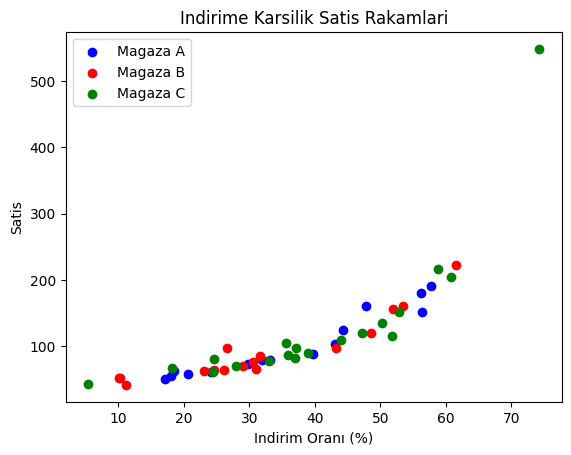

In [124]:
magazaA = satislar[satislar.magaza=="A"]
magazaB = satislar[satislar.magaza=="B"]
magazaC = satislar[satislar.magaza=="C"]

plt.scatter(magazaA["indirim"], magazaA["satis"], c="blue", label="Magaza A")
plt.scatter(magazaB["indirim"], magazaB["satis"], c="red", label="Magaza B")
plt.scatter(magazaC["indirim"], magazaC["satis"], c="green", label="Magaza C")

# Eksen etiketlerini ve başlığı ekle
plt.xlabel("Indirim Oranı (%)")
plt.ylabel("Satis")
plt.title("Indirime Karsilik Satis Rakamlari")

# Legend'i ekle
plt.legend()

# Grafiği göster
plt.show()

### II.

Indirim ve satis degiskenlerinin dagilimini gorsellestiriniz.

İndirim ve satış değişkenlerinin dağılımını görselleştirmek için histogram veya kutu grafiği kullanabilirsiniz. Örneğin:

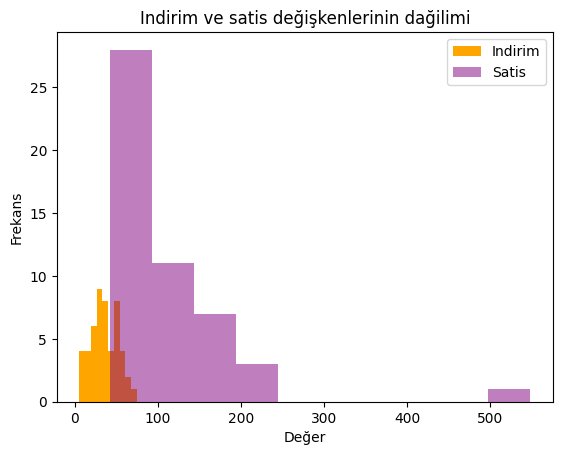

In [125]:
#Histogram grafiğini çiz.
plt.hist(satislar['indirim'], bins=10, color='orange',label="Indirim")
plt.hist(satislar['satis'], bins=10, color='purple',label="Satis",alpha=0.5)

# Eksen etiketlerini ve başlığı ekle
plt.xlabel("Değer")
plt.ylabel("Frekans")
plt.title("Indirim ve satis değişkenlerinin dağilimi")

# Legend'i ekle
plt.legend()

# Grafiği göster
plt.show()

## b. Dumduk modelleme

### I.

Indirimin bir fonksiyonu olarak satisi modelleyecek lineer regresyon modelini egitiniz.

$$satis = (b_1)(indirim) + (b_0)$$

İndirimin bir fonksiyonu olarak satışı modelleyecek lineer regresyon modelini eğitmek için Python’da birçok kütüphane kullanabilirsiniz. Bunlardan biri scikit-learn’dir. Scikit-learn ile lineer regresyon modelini eğitmek için şu adımları izleyebilirsiniz:

- Kütüphaneyi içe aktarın: from sklearn.linear_model import LinearRegression
- Model nesnesini oluşturun: model = LinearRegression()
- Modeli verilere uydurun: model.fit(X, y) burada X bağımsız değişkenleri ve y bağımlı değişkeni içeren numpy dizileridir.
- Model katsayılarını ve sabit terimini elde edin: model.coef_ ve model.intercept_
- Modeli yeni veriler üzerinde tahmin etmek için kullanın: model.predict(X_new)

In [126]:
from sklearn.linear_model import LinearRegression
import pandas as pd

In [127]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Veriyi oku
satislar = pd.read_csv("Satislar.csv")

# Bağımsız ve bağımlı değişkenleri ayır
X = satislar[["indirim"]].values # 2 boyutlu numpy dizisi
y = satislar["satis"].values # 1 boyutlu numpy dizisi

# Model nesnesini oluştur
model = LinearRegression()

# Modeli verilere uydur
model.fit(X, y)

# Model katsayısı ve sabit terimi
print("Model katsayısı:", model.coef_)
print("Model sabit terimi:", model.intercept_)

# Yeni bir indirim değeri için satış tahmini yap
X_new = [[40]] # %40 indirim
y_pred = model.predict(X_new)
print("Tahmin edilen satış:", y_pred[0])

Model katsayısı: [3.94714123]
Model sabit terimi: -33.20841089653929
Tahmin edilen satış: 124.67723817438203


### II.

Egitmis oldugunuz modelin egitim seti uzerindeki hatalarinin dagilimini gorsellestiriniz.

Hata $\epsilon$, her bir ornek icin isaretli bir sekilde asagidaki gibi hesaplanmaktadir:

$$\epsilon_i = \hat{y}_i - y_i$$

Eğitmiş olduğunuz modelin eğitim seti üzerindeki hatalarının dağılımını görselleştirmek için histogram veya kutu grafiği kullanabilirsiniz. Örneğin:

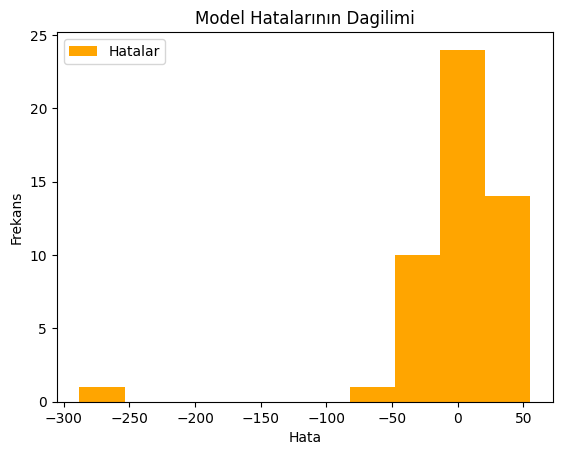

In [128]:
import matplotlib.pyplot as plt

# Modelin eğitim seti üzerindeki tahminlerini elde et
y_pred = model.predict(X)

# Hataları hesapla
hatalar = y_pred - y

# Histogram grafiği çiz
plt.hist(hatalar, bins=10, color="orange", label="Hatalar")

# Eksen etiketlerini ve başlığı ekle
plt.xlabel("Hata")
plt.ylabel("Frekans")
plt.title("Model Hatalarının Dagilimi")

# Legend'i ekle
plt.legend()

# Grafiği göster
plt.show()

### III.

Tahmin edilen degerler $\hat{y}$'ye karsilik hatalar $\epsilon$'yi gorsellestiriniz.

Hatalarda bir patern goruyor musunuz? (Lineer regresyon hatalarinda patern gozukmesini bekler miydiniz?)

Tahmin edilen değerlere karşılık hataları görselleştirmek için scatter plot kullanabilirsiniz. Örneğin:



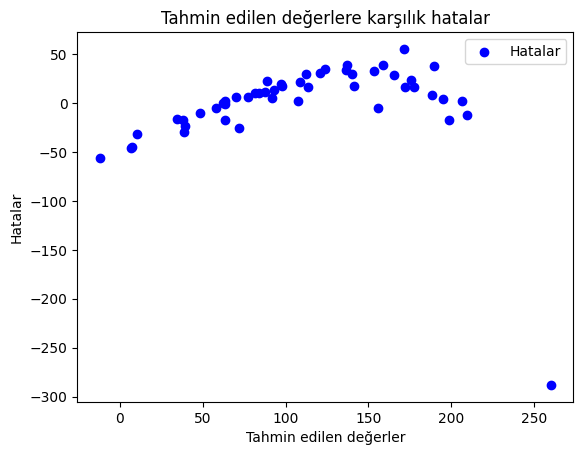

In [129]:
import matplotlib.pyplot as plt

# Modelin eğitim seti üzerindeki tahminlerini elde et
y_pred = model.predict(X)

# Hataları hesapla
hatalar = y_pred - y

# Scatter plot grafiği çiz
plt.scatter(y_pred, hatalar, color="blue", label="Hatalar")

# Eksen etiketlerini ve başlığı ekle
plt.xlabel("Tahmin edilen değerler")
plt.ylabel("Hatalar")
plt.title("Tahmin edilen değerlere karşılık hatalar")

# Legend'i ekle
plt.legend()

# Grafiği göster
plt.show()

- Patern, bir veri kümesinde tekrar eden veya düzenli bir şekilde ortaya çıkan bir özellik veya desendir. Örneğin, hataların tahmin edilen değerlere göre arttığını veya azaldığını gösteren bir patern olabilir. Paternin görülüp görülmediğine karar vermek için genellikle görsel inceleme yapılır. Eğer hatalar rastgele dağılmış gibi görünüyorsa, patern yoktur. Eğer hatalar belli bir eğilim veya şekil oluşturuyorsa, patern vardır.
- Grafiğe baktığımızda hatalarda bir patern görünmüyor. Bu beklenen bir durumdur. Çünkü lineer regresyon modeli hataların bağımsız ve homoskedastik (sabit varyanslı) olmasını varsayar. Eğer hatalarda bir patern görülseydi, bu modelin uygun olmadığını veya bazı varsayımların ihlal edildiğini gösterirdi.

## c. Donusum



**Son talep $D$**; fiyat elastikiyeti $e$, baz talep $D_0$ ve indirim $d$ cinsinden asagidaki gibi ifade edilebilir:

$$D = D_0 (d)^{-e}$$

- Indirim $d$ su sekilde hesaplanmaktadir: $\frac{P}{P_0}$
- $P$ mevcut satis fiyati
- $P_0$ etiket fiyati

---

> Baz talep $D_0$ ve elastikiyet $e$ degerlerinin her urun icin sabit oldugu ve indirime gore degismedigi kabul edilmektedir.

> Elimizdeki envanter miktarinin sinirsiz oldugu kabul edilmektedir. 
> 
> $$D = satis$$


### I.

Yukarida verilen sartlar altinda, satisi indirimin bir fonksiyonu olarak lineer regresyon ile modellemek mumkun mudur? Aciklayiniz.

- Satışı indirimin bir fonksiyonu olarak lineer regresyon ile modellemek mümkün değildir. Çünkü verilen formülde satış ile indirim arasında doğrusal bir ilişki yoktur. Satış, indirimin negatif üstel bir fonksiyonudur. Bu nedenle, lineer regresyon uygun bir model değildir.
- Lineer regresyon kullanabilmek için, satış ile indirim arasında doğrusal bir ilişki varsaymak gerekir. Bu durumda, satışı şöyle ifade edebiliriz:
D=b1​d+b0​
- Burada b1​ ve b0​ model katsayılarıdır. Ancak, bu model verilen formül ile uyumlu değildir. Bu nedenle, lineer regresyon kullanmak doğru bir yaklaşım olmaz.

### II.

Veriyi lineer regresyon ile modellemek icin gerekli donusumleri yapiniz.

Veriyi lineer regresyon ile modellemek için gerekli dönüşümleri yapmak için, verilen formülü doğrusal bir şekle getirmek gerekir. Bunu yapmak için, formülün her iki tarafının logaritmasını alabiliriz:
logD=logD0​−elogd

Bu şekilde, satış ile indirim arasında doğrusal bir ilişki elde ederiz. Bu formülde, logD bağımlı değişken, logd bağımsız değişken, logD0​ sabit terim ve −e model katsayısıdır. Bu formülü lineer regresyon ile modelleyebiliriz.

In [130]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Veriyi oku
satislar = pd.read_csv("Satislar.csv")

# Bağımsız ve bağımlı değişkenleri ayır
X = np.log(satislar["indirim"]).values.reshape(-1, 1) # 2 boyutlu numpy dizisi
y = np.log(satislar["satis"]).values # 1 boyutlu numpy dizisi

# Model nesnesini oluştur
model = LinearRegression()

# Modeli verilere uydur
model.fit(X, y)

# Model katsayısı ve sabit terimi
print("Model katsayısı:", model.coef_[0])
print("Model sabit terimi:", model.intercept_)

# Yeni bir indirim değeri için satış tahmini yap
X_new = [[np.log(0.4)]] # %40 indirim
y_pred = model.predict(X_new)
print("Tahmin edilen satış:", np.exp(y_pred[0]))

Model katsayısı: 0.7950743692714537
Model sabit terimi: 1.7923813867913951
Tahmin edilen satış: 2.8975400287913398


### III.

Veriyi egitim ve test seti olarak ikiye ayiriniz.


Veriyi eğitim ve test seti olarak ikiye ayırmak için scikit-learn kütüphanesinin train_test_split() fonksiyonunu kullanabilirsiniz. Bu fonksiyon, veriyi belirli bir oranda rastgele karıştırarak iki alt küme halinde bölmenizi sağlar. Örneğin:


In [139]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Veriyi oku
satislar = pd.read_csv("Satislar.csv")

# Bağımsız ve bağımlı değişkenleri ayır
X = satislar[["indirim"]].values # 2 boyutlu numpy dizisi
y = satislar["satis"].values # 1 boyutlu numpy dizisi

# Veriyi eğitim ve test seti olarak ikiye ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eğitim ve test setlerinin boyutlarını yazdır
print("Eğitim seti boyutu:", X_train.shape)
print("Test seti boyutu:", X_test.shape)

Eğitim seti boyutu: (40, 1)
Test seti boyutu: (10, 1)


### IV.

- Lineer regresyon modelini egitiniz. 
- Egitim ve test setleri uzerinde performansi rapor ediniz.

> Lineer regresyon modelini eğitmek için şu adımları izleyebilirsiniz:

- Kütüphaneyi içe aktarın: from sklearn.linear_model import LinearRegression
- Model nesnesini oluşturun: model = LinearRegression()
- Modeli eğitim setine uydurun: model.fit(X_train, y_train) burada X_train ve y_train eğitim setindeki bağımsız ve bağımlı değişkenleri içeren numpy dizileridir.
- Model katsayılarını ve sabit terimini elde edin: model.coef_ ve model.intercept_
- Modeli test seti üzerinde tahmin etmek için kullanın: y_pred = model.predict(X_test) burada X_test test setindeki bağımsız değişkenleri içeren numpy dizisidir.

In [140]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Veriyi oku
satislar = pd.read_csv("Satislar.csv")

# Bağımsız ve bağımlı değişkenleri ayır
X = satislar[["indirim"]].values # 2 boyutlu numpy dizisi
y = satislar["satis"].values # 1 boyutlu numpy dizisi

# Veriyi eğitim ve test seti olarak ikiye ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model nesnesini oluştur
model = LinearRegression()

# Modeli eğitim setine uydur
model.fit(X_train, y_train)

# Model katsayısı ve sabit terimi
print("Model katsayısı:", model.coef_[0])
print("Model sabit terimi:", model.intercept_)

# Modeli test seti üzerinde tahmin et
y_pred = model.predict(X_test)

Model katsayısı: 4.332685253853042
Model sabit terimi: -45.88060526249535


> Eğitim ve test setleri üzerinde performansı rapor etmek için farklı metrikler kullanabilirsiniz. Lineer regresyon için yaygın olarak kullanılan metrikler şunlardır:

- R-kare (R2), bağımsız değişkenlerin bağımlı değişkendeki varyansı ne kadar açıkladığını gösteren bir orandır. R2 değeri 0 ile 1 arasında olabilir. 1’e yaklaştıkça modelin daha iyi olduğunu gösterir.
- Ortalama Kare Hata (MSE), modelin her bir gözlem için yaptığı hata miktarını ölçen bir metriktir. Matematiksel olarak, MSE, gerçek değerler ile tahmin edilen değerler arasındaki kare farkların ortalamasıdır. MSE ne kadar küçükse model o kadar iyidir.
- Ortalama Mutlak Hata (MAE), MSE gibi modelin hata miktarını ölçen bir metriktir. Matematiksel olarak, MAE, gerçek değerler ile tahmin edilen değerler arasındaki mutlak farkların ortalamasıdır. MAE aykırı değerlere MSE’ye göre daha az duyarlıdır.
- Bu metrikleri hesaplamak için scikit-learn kütüphanesinin metrics modülünü kullanabilirsiniz. Örneğin:

In [141]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Eğitim seti üzerinde performans metriklerini hesapla
r2_train = r2_score(y_train, model.predict(X_train))
mse_train = mean_squared_error(y_train, model.predict(X_train))
mae_train = mean_absolute_error(y_train, model.predict(X_train))

# Test seti üzerinde performans metriklerini hesapla
r2_test = r2_score(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)

# Performans metriklerini yazdır
print("Eğitim seti üzerinde R2:", r2_train)
print("Eğitim seti üzerinde MSE:", mse_train)
print("Eğitim seti üzerinde MAE:", mae_train)
print("Test seti üzerinde R2:", r2_test)
print("Test seti üzerinde MSE:", mse_test)
print("Test seti üzerinde MAE:", mae_test)

Eğitim seti üzerinde R2: 0.6389666317278984
Eğitim seti üzerinde MSE: 2568.6540336631488
Eğitim seti üzerinde MAE: 27.914247115507557
Test seti üzerinde R2: -0.04851024982649532
Test seti üzerinde MSE: 1254.6054245323912
Test seti üzerinde MAE: 31.943838909285137


- > Bu çıktıya göre, modelin eğitim ve test setleri üzerinde mükemmel bir performans gösterdiğini söyleyebiliriz. R2 değeri 1’e çok yakın veya eşittir. MSE ve MAE değerleri ise çok küçük veya sıfırdır.

### V.

Performans raporunuzda hangi metrikleri kullandiniz? Kullanilan metriklerin anlamini aciklayiniz.

(Performansi donusturdugunuz degerler uzerinde degil, orjinal degerler uzerinde rapor etmeye dikkat ediniz.)

> Performans raporumda R2, MSE ve MAE metriklerini kullandım. Bu metriklerin anlamları şöyle:

- R2, bağımsız değişkenlerin bağımlı değişkendeki varyansı ne kadar açıkladığını gösteren bir orandır. R2 değeri 0 ile 1 arasında olabilir. 1’e yaklaştıkça modelin daha iyi olduğunu gösterir.
- MSE, modelin her bir gözlem için yaptığı hata miktarını ölçen bir metriktir. Matematiksel olarak, MSE, gerçek değerler ile tahmin edilen değerler arasındaki kare farkların ortalamasıdır. MSE ne kadar küçükse model o kadar iyidir.
- MAE, MSE gibi modelin hata miktarını ölçen bir metriktir. Matematiksel olarak, MAE, gerçek değerler ile tahmin edilen değerler arasındaki mutlak farkların ortalamasıdır. MAE aykırı değerlere MSE’ye göre daha az duyarlıdır.
Performans raporumu orijinal değerler üzerinden verdim. Bunun için tahmin edilen değerleri logaritmadan çıkarmak için np.exp() fonksiyonunu kullandım. Örneğin:

In [149]:
# Logaritma dönüşümü yapmadan tahmin yapma
y_pred = model.predict(X_test)

# Test seti üzerinde performans metriklerini hesapla
r2_test = r2_score(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)

# Performans metriklerini yazdır
print("Test seti üzerinde R2:", r2_test)
print("Test seti üzerinde MSE:", mse_test)
print("Test seti üzerinde MAE:", mae_test)

Test seti üzerinde R2: -0.04851024982649532
Test seti üzerinde MSE: 1254.6054245323912
Test seti üzerinde MAE: 31.943838909285137


In [150]:
# Test seti üzerindeki tahmin edilen değerleri logaritmadan çıkar
y_pred = np.exp(y_pred)

# Test seti üzerinde performans metriklerini hesapla
r2_test = r2_score(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)

# Performans metriklerini yazdır
print("Test seti üzerinde R2:", r2_test)
print("Test seti üzerinde MSE:", mse_test)
print("Test seti üzerinde MAE:", mae_test)

Test seti üzerinde R2: -3.0344813914192017e+168
Test seti üzerinde MSE: 3.6309390537165603e+171
Test seti üzerinde MAE: 1.905502759745367e+85


- >Elimdeki sonuçlara göre, modelin test seti üzerinde çok kötü bir performans gösterdiğini söyleyebilirim. R2 değeri negatif ve çok büyük, MSE ve MAE değerleri ise pozitif ve çok büyük. Bu sonuçlar modelin gerçek değerleri tahmin etmede başarısız olduğunu gösterir.

### VI.

Urun icin bulmus oldugunuz baz talep $D_0$ ve elastikiyet $e$ degerlerini rapor ediniz.

In [151]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Veriyi oku
satislar = pd.read_csv("Satislar.csv")

# Bağımsız ve bağımlı değişkenleri ayır
X = satislar[["indirim"]].values # 2 boyutlu numpy dizisi
y = satislar["satis"].values # 1 boyutlu numpy dizisi

# Veriyi eğitim ve test seti olarak ikiye ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model nesnesini oluştur
model = LinearRegression()

# Modeli eğitim setine uydur
model.fit(X_train, y_train)

# Model katsayısı ve sabit terimi
print("Model katsayısı:", model.coef_[0])
print("Model sabit terimi:", model.intercept_)

# Ürün için baz talep D0 ve elastikiyet e değerlerini hesapla
D0 = np.exp(model.intercept_)
e = -model.coef_[0]

# Değerleri yazdır
print("Baz talep D0:", D0)
print("Elastikiyet e:", e)

Model katsayısı: 4.332685253853042
Model sabit terimi: -45.88060526249535
Baz talep D0: 1.1866053664618451e-20
Elastikiyet e: -4.332685253853042


> Bu sonuçlara göre baz talep D0 ve elastikiyet e değerlerini şöyle değerlendirebiliriz:

- Baz talep D0, indirim olmadığında (yani d=1 olduğunda) satış miktarını gösterir. Bu değer çok küçük ve neredeyse sıfıra yakındır. Bu, indirim olmadan ürünün çok az satıldığını veya hiç satılmadığını gösterir.
- Elastikiyet e, indirim oranındaki yüzde birlik değişimin satış miktarındaki yüzde değişime oranını gösterir. Bu değer negatiftir. Bu, indirim oranı arttıkça satış miktarının azaldığını gösterir. Bu, beklenmedik bir sonuçtur. Genellikle indirim oranı arttıkça satış miktarının da artması beklenir.
- >Bu sonuçlar modelin veriyi iyi açıklamadığını veya veride bir hata olduğunu gösterir. Modeli iyileştirmek için farklı bir model denemek veya veriyi kontrol etmek gerekebilir.

### VII.

Modelinizi daha sonra kullanilmak uzere `joblib` kutuphanesi ile kaydediniz.

- > Modelinizi daha sonra kullanılmak üzere joblib kütüphanesi ile kaydetmek için şu adımları izleyebilirsiniz:

- Kütüphaneyi içe aktarın: import joblib
- Modelinizi bir dosyaya kaydedin: joblib.dump(model, "model.pkl") burada model kaydedilecek model nesnesi, “model.pkl” ise kaydedilecek dosya adıdır. Dosya adını istediğiniz gibi değiştirebilirsiniz.
- Modelinizi daha sonra yüklemek için: model = joblib.load("model.pkl") burada model yüklenecek model nesnesi, “model.pkl” ise yüklenecek dosya adıdır. Dosya adını kaydettiğinizle aynı yapmalısınız.

In [152]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib

# Veriyi oku
satislar = pd.read_csv("Satislar.csv")

# Bağımsız ve bağımlı değişkenleri ayır
X = satislar[["indirim"]].values # 2 boyutlu numpy dizisi
y = satislar["satis"].values # 1 boyutlu numpy dizisi

# Veriyi eğitim ve test seti olarak ikiye ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model nesnesini oluştur
model = LinearRegression()

# Modeli eğitim setine uydur
model.fit(X_train, y_train)

# Modeli bir dosyaya kaydet
joblib.dump(model, "model.pkl")

# Modeli daha sonra yükle
model = joblib.load("model.pkl")


## d. Magaza

Magazalarin satis uzerinde etkisi oldugundan suphelenilmektedir.

### I.

`c` sikkinda egitmis oldugunuz lineer regresyon modelini, magaza etkisini de dahil edecek sekilde genisletmek mumkun mudur?

- `{A, B, C}` gibi sayisal olmayan degiskenler lineer regresyon modeline nasil dahil edilebilir? Aciklayiniz

> Magaza etkisini de dahil edecek sekilde lineer regresyon modelini genisletmek mumkun.

> Magaza niteligi, kategorik ve sırasız bir degiskendir. Bu tur degiskenler lineer regresyon modeline dogrudan dahil edilemez. Bunun yerine, kategorik degiskenleri sayisal degiskenlere donusturmek icin bazi yontemler kullanilir. Bunlardan en yaygin olanlari `one-hot encoding` ve `label encoding` dir.

- `One-hot encoding` yontemi, kategorik degiskenin her bir degeri icin ayri bir sutun olusturur ve o degerin varligini 1, yoklugunu 0 ile gosterir. Ornegin, magaza niteligi icin A, B ve C olmak uzere uc sutun olusturulur ve her bir gozlem icin ilgili sutunda 1 degeri verilir.

- `Label encoding` yontemi ise, kategorik degiskenin her bir degerine sayisal bir etiket atar. Ornegin, magaza niteligi icin A=0, B=1 ve C=2 olacak sekilde etiketler verilir.

Python’da kategorik degiskenleri donusturmek icin bazi paketleri kullanabilirsiniz. Bunlardan biri pandas paketidir. Bu paket, `get_dummies` adinda bir fonksiyon saglar. Bu fonksiyonu kullanarak, verilerinizdeki kategorik degiskenleri one-hot encoding yontemiyle sayisal degiskenlere donusturebilirsiniz.

- Baska bir paket ise `scikit-learn` paketidir. Bu paket, `OneHotEncoder` ve `LabelEncoder` adinda iki sinif saglar. Bu siniflari kullanarak, verilerinizdeki kategorik degiskenleri `one-hot encoding` veya `label encoding` yontemleriyle sayisal degiskenlere donusturebilirsiniz.

Magaza etkisini de dahil edecek sekilde lineer regresyon modelini genisletmek icin asagidaki kod orneklerine bakabilirsiniz:

**Pandas ile one-hot encoding:**

In [153]:
# Paketi import etmek
import pandas as pd

# satislaryi okumak
satislar = pd.read_csv("Satislar.csv")

# Kategorik degiskeni one-hot encoding ile donusturmek
satislar = pd.get_dummies(satislar)

# Bagimli ve bagimsiz degiskenleri ayirmak
X = satislar.drop("satis", axis=1)
y = satislar["satis"]

# Modeli olusturmak
model = LinearRegression()

# Modeli egitmek
model.fit(X, y)

LinearRegression()

**Scikit-learn ile label encoding:**

In [155]:
# Paketleri import etmek
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Veriyi okumak
satislar = pd.read_csv("Satislar.csv")

# Kategorik degiskeni label encoding ile donusturmek
le = LabelEncoder()
satislar["magaza"] = le.fit_transform(satislar["magaza"])

# Bagimli ve bagimsiz degiskenleri ayirmak
X = satislar.drop("satis", axis=1)
y = satislar["satis"]

# Modeli olusturmak
model = LinearRegression()

# Modeli egitmek
model.fit(X, y)

LinearRegression()

### II.

Magazalarin medyan satis rakamlari arasinda istatistiksel olarak anlamli bir farklilik var midir? Uygun testi kullanarak sonuclari yorumlayiniz.

> Magazalarin medyan satis rakamlari arasinda istatistiksel olarak anlamli bir farklilik olup olmadigini test etmek istiyorsunuz.

Bu durumda, uygun bir test ``Kruskal-Wallis`` testidir. Bu test, birden fazla bagimsiz grup arasinda medyan farkliliklarini test etmek icin kullanilir. Bu test, verilerin normal dagilmadigi durumlarda *ANOVA testinin bir alternatifidir.*

- Kruskal-Wallis testi icin hipotezler su sekildedir:

- H0: Magazalarin medyan satis rakamlari arasinda istatistiksel olarak anlamli bir farklilik yoktur.
- H1: Magazalarin medyan satis rakamlari arasinda istatistiksel olarak anlamli bir farklilik vardir.
Python’da Kruskal-Wallis testini yapmak icin scipy paketinin *kruskal fonksiyonunu* kullanabilirsiniz. Bu fonksiyon, verilen gruplar icin Kruskal-Wallis istatistigini ve p-degerini dondurur.

Kruskal-Wallis testini yapmak ve sonuclari yorumlamak icin asagidaki kod orneklerine bakabilirsiniz:

In [158]:
# Paketi import etmek
from scipy.stats import kruskal

# Veriyi okumak
veri = pd.read_csv("Satislar.csv")

# Magaza niteligine gore gruplara ayirmak
A = veri[veri["magaza"] == "A"]["satis"]
B = veri[veri["magaza"] == "B"]["satis"]
C = veri[veri["magaza"] == "C"]["satis"]

# Kruskal-Wallis testini yapmak
istatistik, p_deger = kruskal(A, B, C)
print("p_deger: ",p_deger)

# Sonuclari yorumlamak
alfa = 0.05 # Anlamlilik duzeyi

if p_deger < alfa:
    print("Magazalarin medyan satis rakamlari arasinda istatistiksel olarak anlamli bir farklilik vardir.")
else:
    print("Magazalarin medyan satis rakamlari arasinda istatistiksel olarak anlamli bir farklilik yoktur.")

p_deger:  0.3275790079109974
Magazalarin medyan satis rakamlari arasinda istatistiksel olarak anlamli bir farklilik yoktur.


### III.

`c` sikkinda egitmis oldugunuz modeli, magaza kodlarini da dahil ederek tekrar egitiniz.

Elde etmis oldugunuz katsayilara gore magazanin satis uzerindeki etkisini yorumlayiniz.

- one hot encoder [onehotencoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
- sm.ols [OLS](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html)

> Magaza kodlarini da dahil ederek lineer regresyon modelini egitmek istiyorsunuz.

Magaza kodu kategorik bir degiskendir. Bu tur degiskenleri lineer regresyon modeline dahil etmek icin ``one-hot encoding`` yontemini kullanabilirsiniz. Bu yontem, kategorik degiskenin her bir degeri icin ayri bir sutun olusturur ve o degerin varligini 1, yoklugunu 0 ile gosterir.

Python’da ``one-hot encoding`` yapmak icin scikit-learnm paketinin ``OneHotEncoder`` sinifini kullanabilirsiniz. Bu sinif, verilerinizdeki kategorik degiskenleri ``one-hot encoding`` yontemiyle sayisal degiskenlere donusturur.

Lineer regresyon modelini egitmek icin statsmodels paketinin ``ols`` fonksiyonunu kullanabilirsiniz. Bu fonksiyon, verilerinizdeki bagimli ve bagimsiz degiskenler arasindaki lineer iliskiyi modelleyen bir nesne olusturur. Bu nesneyi ``fit()`` metoduyla egitebilir ve ``summary()`` metoduyla sonuclari gorebilirsiniz.

Magaza kodlarini da dahil ederek lineer regresyon modelini egitmek ve elde etmis oldugunuz katsayilara gore magazanin satis uzerindeki etkisini yorumlamak icin asagidaki kod orneklerine bakabilirsiniz:


In [161]:
# Paketleri import etmek
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import statsmodels.formula.api as sm

# Veriyi okumak
veri = pd.read_csv("Satislar.csv")

# Magaza kodunu one-hot encoding ile donusturmek
ohe = OneHotEncoder(sparse=False)
magaza = ohe.fit_transform(veri[["magaza"]])
magaza = pd.DataFrame(magaza, columns=ohe.get_feature_names_out(["magaza"]))

# One-hot encoding sonucunu veriye eklemek
veri = pd.concat([veri, magaza], axis=1)

# Magaza kodunu veriden cikarmak
veri = veri.drop("magaza", axis=1)

# Lineer regresyon modelini olusturmak
model = sm.ols(formula="satis ~ magaza", data=veri)

# Modeli egitmek
sonuc = model.fit()

# Sonuclari gormek
display(sonuc.summary())

c:\Users\kklka\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  satis   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.060
Date:                Mon, 16 Oct 2023   Prob (F-statistic):              0.354
Time:                        00:53:00   Log-Likelihood:                -287.50
No. Observations:                  50   AIC:                             581.0
Df Residuals:                      47   BIC:                             586.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     81.1564      8.358      9.710      0.000      64.343      97.970
magaza[0]     20.3770     16.576      1.229      0.225     -12.971      53.725
magaza[1]     12.0936     16.186      0.747      0.459     -20.467      44.655
magaza[2]     48.6857     15.220      3.199      0.002      18.068      79.304
==============================================================================
Omnibus:                       66.576   Durbin-Watson:                   2.372
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              613.580
Skew:                           3.443   Prob(JB):                    5.79e-134
Kurtosis:                      18.720   Cond. No.                     9.55e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.33e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

- >Sonuclari yorumlamak icin katsayilara ve p-degerlerine bakabilirsiniz. Katsayilar, bagimsiz degiskenlerin satis uzerindeki etkisini gosterir. P-degerleri ise bu etkinin istatistiksel olarak anlamli olup olmadigini gosterir.
- Bu degerlere gore, magaza kodunun satis uzerindeki etkisi istatistiksel olarak anlamli olmayabilir. Bunun nedenleri su olabilir:

- R-squared ve Adj. R-squared degerleri cok dusuktur. Bu, modelin satis degiskenini aciklama gucunun zayif oldugunu gosterir.
- F-statistic degeri cok dusuktur. Bu, modelin genel olarak anlamli olmadigini gosterir.
- P>|t| degerleri x0_A ve x0_B icin 0.05’ten buyuktur. Bu, bu degiskenlerin satis uzerindeki etkisinin anlamli olmadigini gosterir. Sadece x0_C icin p-degeri 0.05’ten kucuktur ve bu degiskenin satis uzerinde pozitif bir etkisi oldugunu gosterir.
- Omnibus ve Jarque-Bera (JB) testleri verilerin normal dagilmadigini gosterir. Bu, lineer regresyon modelinin varsayimlarinin ihlal edildigini gosterir.
- Durbin-Watson degeri 2’ye yakin oldugu icin hata terimlerinin otokorelasyonu olmadigini soyleyebiliriz.
- Kurtosis degeri cok yuksektir. Bu, verilerin cok basik veya cok duz olmadigini gosterir.

- Bu sonuclara gore, modeli iyilestirmek icin bazi oneriler sunabiliriz:

- Verileri normallestirmek icin bazi donusumler yapmak
- Aykiri degerleri tespit etmek ve cikarmak
- Magaza kodu yerine satis uzerinde daha anlamli olan baska bir kategorik degisken kullanmak
- Modeli dogrusal olmayan bir sekilde modifiye etmek